Будем тренироваться строить описание на основе датасете MNIST:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

digits = fetch_openml('mnist_784')
images = digits.data.values.reshape(-1, 28, 28)
pca = PCA(n_components=50)
X_transformed = pca.fit_transform(digits.data.astype(float))#как я понимаю, тут мы получили 50 мерное пространство, трансформировав исходное
X_restored = pca.inverse_transform(X_transformed)#обратная к выше стоящей операция 
%matplotlib inline
print(sum(pca.explained_variance_ratio_))


0.8253844855222922


In [ ]:
pca.explained_variance_ratio_

### Задача 1
Выпишите явное линейное преобразование, которое отображает точку из подространства главных компонент в исходное пространство (заполните ??? так, чтобы результат совпал с результатом в предыдущей ячейке)

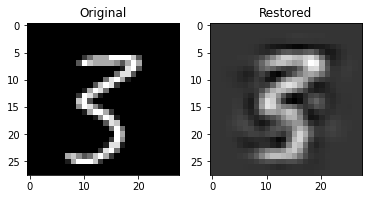

In [3]:
res = np.dot(X_transformed, pca.components_) + pca.mean_

i = 540
fig, ax = plt.subplots(1, 2)

ax[0].imshow(images[i], cmap='gray')
ax[1].imshow(res[i].reshape(28, 28), cmap='gray')

ax[0].set_title('Original')
ax[1].set_title('Restored')
plt.show()

In [19]:
### Задача 2

#Определите, сколько нужно взять главных компонент, чтобы объяснить  99%, 95%, 90%, и 85% исходной дисперсии.



In [5]:
def find(n): 
    pca = PCA(n_components = n, svd_solver = 'full')
    k = pca.fit_transform(digits.data.astype(float))
    m = pca.inverse_transform(k)
    return (pca.n_components_)

In [6]:
def find_for_3(n): 
    pca = PCA(n_components = n, svd_solver = 'full')
    k = pca.fit_transform(digits.data.astype(float))
    l = pca.inverse_transform(k)
    return l

In [9]:
for i in (0.99, 0.95, 0.90, 0.85): 
    print("for %f : %d" % (i, find(i)))

for 0.990000 : 331
for 0.950000 : 154
for 0.900000 : 87
for 0.850000 : 59


In [20]:

### Задача 3

#Нарисуйте пример исходного изображения и результат восстановления из числа компонент, которое вы нашли в предыдущей задаче.

#[img](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABIEAAAEBCAYAAADvvrW+AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvNQv5yAAAIABJREFUeJzs3Xe8HGXZ//HvRUhCIAUCJoRQQhJ6IJTQw2No0ptIE5GgiF34CSoC/oyF56eI2BAVAQMP3QdRekRaCDX0IB08SEgjhPQe7t8f9xzZbPa6zzlz9uzOyX7er9e+ztm5ptw7O9fM7L2zc1kIQQAAAAAAAFi9rVHvBgAAAAAAAKDj0QkEAAAAAADQAOgEAgAAAAAAaAB0AgEAAAAAADQAOoEAAAAAAAAaAJ1AAAAAAAAADYBOoBowsyYzO6eN0wQz+1SV2zHGzF6s5jyBejOzNczsD2b2fpY3o+rYllFZGzZowzRjzeyOjmxXtpwRWdsGdfSyEm2YYGa/rNfyUVvkZquXQ26ipsxsbTP7XzObU4Btb7SZzW/jNA+a2aUd1aaS5XzKzEJHL6eFNkw2s7Pq2QbUBsfMVi+HY2YV0AnUCmY20Mwuz3bES83sXTP7o5lt3MpZ7CrpsjYudoCk29s4Tbt1ROcTOhcz62VmvzSzt81skZk9ama7lo3TP9vZTzGzhWZ2j5ltUTbOJWY2y8zeMbOTy2JHZDtQq0KTD5V0mqQjFPPm0QqvaVC2bVd6HFyFNrTHmZI+U+c2yMxeMLMrnNih2brasp2LOVLS99o5j4bVytwcW2Ebf7xsHHKzdchNtEorc9Msfhk3JRvnQTPbriTe3cz+x8zmmtlrZnZA2fTfMLPrq9Tkz0n6L0kjFXPznQqvaZT5ubl1ldqR1yclfbeeDTCzbmb2npld4MS/kp0f9WnnonaSdHk759GQzKyLmf3IzP5lZouzvz82szVLxuGYWT0cMzuRNVsepbGZ2eaKSfgvSadKel3SEEkXSppoZnuGEJqcabuFEJaGEN5r63JDCNPytxpolysk7aC4vU9W3KH/w8y2DSG8mx3o/irpQ0lHS5oj6Zsl4ywwsyMkfVrSJyRtIekqMxsXQphpZr0k/ULSkSGEanzDNlTS1BDCKgfLCg6W9HzZsFlVaENuIYQ59Vx+iSsl/djMzgwhLCiLfU7SwyGE1/LMuGRfWNd1vRpI5mbJeP+QdErJ86XN/5CbrUduog1ak5vflnS2pNGSXpX0fyXda2ZbhRDmSTpD0i6S9pR0iKTrzax/CCGY2SaKx9ndqtTeoZJeDiFMasW422nVXGzzeW01FWF7DSEsNbNrJZ1mZhdW2Gd+TtL/5t2PtOczBP7jO5K+qpiXkxRz9GpJSyT9qGQ8jplVwDGzkwkh8Eg8JN0l6V1Ja5cNXzsbfmfJsAcl/U7SxYoHyInZ8CZJ55SMt6WkhyQtVjwROFTSfEmjS8YJkj6V/T8oe36spHslLZT0kqQDS8bvorjR/0vSIsXOqm9LWqNknDGSXmzh9f5nuSXPvyzpb9lyX5O0r6SNJY2TtEDSc5J2LplmfUk3KJ4ILZL0T0mnlS1nHUnXZK97uuI3OndIGlsyTjdJP83ms0DSREkH1XubWJ0fknpIWi7pqLLhT0v6ccn2GyQNL4mvIWmGpNOz59+WdGNJfLqkXbP/fyNpTBva9F+SnsjyZbriAbdbFhubtaX50eTMozmHRjhxy3LrH5IsG9Yzy6NLs+ejsnkcnm3zi7P1skvJfJrH2aANuTBW0h0lzx9UvHLwvyXNzNbrxWW53GJuKJ4gvJK182HFk5ggaZCzDvpm45a372OKJ0SfzZ53lXSVPtrXvCbpnOb1lo1zrWJH4XmK+8mp2fAJkn5ZMt6pkp6SNC97b2+SNKAkfkDW5v2y17gw+zu8rI17S3ogWxezs/exf8m2+V1Jb2XtnSTppHrnWkfkZqXtqcJ8yE1yk9yscW5m2/FUSeeXTTdP0hez55dJ+klJLEj6WPb8NpWcI7aiTZ/M1ucSxat8ztdH+fOgVs7NB515jFJJzlSIryXpRUlXlQzbKMuNc7LnoxXP847ItsfF2fYwuGSa0ZLmlzwfonjOOS3bbp6RdHjZsh9Ulv/Z8yZJF0j6g6S5ivn3rbJp+iheUTMjW+8PqWy/I+mzkt7Otuc7FDsQQmI9b5eto33Lhg/Phv9XSa7emLVrYbbePls2zQRJl0q6RPEzxGPZ8MmSzioZ71vZe7sgi/1BUp+S+OmKuXag4meFBZLul7RZ2fKOkPRk9p68n21jzfvv7pJ+priPWJCNd0C9cy1Hbt4h6eqyYVdr5f36WHHM5JjZgMfMuidokR/ZRvShpPOc+PlZfL2SjX2epJ9L2lrSNtnwJn10QFwjS5z7JO2o+I3PE5KWqeVOoFcUd9pbKO7E3pfUs2RD/qHiT88GSTo+23g+XzLPMcrXCfSupJOy5V6veGAeJ+koxQ6BuyS9UDLNQMWD1I6SBit+u7VU0v4l4/xe8UB7oOJB9EbFK0rGloxznaTHFXeagyV9LZvP8NRr4NGubb5X9p6X74AnKDtRlLR9Ns5WZeO80/z+STpI0huS1lP8ZnNu9v8eiic/3VrZnoGKO8LfS9pG8YA1TdLPs3gfST/Ilr2hshPmCvNpzqGKB81snOaT129lz6/KcrVH9nxUSR4eJGmYpD9n7Vm7bJwNStrfUi6M1aoHzTmK+bylYi4vV8mOvqXckLSJ4gHwN4r7ouMVD7DuQTOb7kbFb0hKh30za0/za1xLcV/SvK85MXt/Ty2Z5lrFfeE1ivk9rGQ7Kj1onq74jfdgSbsrnpQ/UBJvPmg+Lunj2Wv5R7YNNZ/c7Jy91t8pnnhvq9hxvXEW/6mkl7P3bHPFb+gXSjq43vlW7dws2Z5mK55svSbpj5L6lcTJTXKT3KxxbmbrMSj78Fgyzp3KPqRK+mI2TQ/Fq2ynKH6gO17SfW1ozy6SVijm35aSTlbsiPl6Fu+rmEOPKuZmX2c+o5ToBMrG2SF7j4/L2voPxfPb5m1gtOL57VOKH252kjRe8QqG0nFKO4GGS/qS4rnGUMVz7aWSti7LxfJOoPcV822opK9nbd8zi1u2bu9UvJpqqOKVIHOVfVDLtvMPs+Vtmb0f7yvRCZRN97ik/ykb9mtJr5U831Txw2Xz/uZL2XoZVba9zJN0kaSt9NFniPJOoG8qfhm7efYevSjpT2W5u1SxI2DXbH0+r5W/tD5ccd/1Q8W8HK7Y2dE9i9+UbR/7KHbKnanYoTis3vnWxtw8V9K/m7ed7LW+I+krJeOMFcdMjpkNeMyse4IW+ZG9iUHSMU78mCy+W8nG/kKF8Zr0USfQQVkCDCyJ75XNZ3TJsKBVO4G+WBIfmA0bmWj/TyT9o+T5GOXrBPp/Jc+HZcO+WTJslFo+UbhR0hXZ/z0VE/zEkvg6kj7QR50IQxQPxpuWzeevki6r97axOj8UD/wPZ9tYl2wns0LSq1m8a7ZN36J4MtlN8ZLbIGlc2fb2hmJP9THZdM8r3oPgi9mO7GlJeyXacmE2j9JvDUYrnow078TPkfONSck0zTm0UPFkuPRR+g3a0froMuElWvlqp+bt/OSSYT0VTx5OLxunVbmQPR+rVQ+aj5VNc29J/rSYG4rfurymlb/NuEAtHzSbD1Jblgx7UdLvWli/F0u6p+T5tYonE93KxlvpoFlhPs37lw3L2lN6kvHxsnFukjTBmV8vxQPqnmXDL5V0W71zrdq5mY1zouJv1bdX/NLg+ew97F4yzhiRm+TmyuORm+14qOXjZvN5Xvm2cZWy46ZiHv5W8VvpiYr5uK7it75DJX0/23bGq6RDpEJbrpN0f9mwMZIml63nB1t4Tc05U56Xk8vGO0vx/O0SxU6T0vPb0dk89i4Ztlm2bg4oGWd+C215XNIFJc8f1KqdQDeUTfN68zSK377PV/YhuGSc5yR9O/v/ekn3lsWvUMudQKcr7r/6ZM+7Z+vhOy1M97+Sfl/yfIKkZyuMt1InUIX44dnyraQ9QdKQknFOlbSo5PkTkq515rel4n5so7Lhd0j6db1zrS0Pxc6/C7PXsyxbLz8uG4djZuCYWTJOwxwzuSdQ6wRnuFWIP93CvLaWNCWsfP+GiYpJ0JIXSv6fkv3t95/GmH1Jcee/meI3SV0Vr7Zpr9LlTs/+TqowrJ+kmWbWRbH3/QTFE6Luih0FD2bjDcna9mTzDEK8j0xp5bKdFdfvS2X3WuuueFkrOs4piiemkxVP1J5RvAR0Z0kKISwzs2MVf374fjbOPyTdXTqTEMIYxQOnJCm7eeJj+uhbgR0VD7p/NrPNQwhLtaptFA8gpfkxQXF7GqqVt83W+LTiQaDUvJI2/zW78eYFiieG5b+3VvYamsefb2aTFHvrV9GKXPCUv64p+ijXW5Mb20h6PGRHiPJ2J9yn+AHkc5LONbPdFb/5OLV0JDP7quLNC0v3NW+WzWuS856WzmeE4n0xhit2KDYXK9hU8aDbzNv3TVP8ZvkGZxHDFNfLvWXrqqviyVhnk8xNSQoh3Fgy/iQze1rxOHCYpL9k44wRuUluJpCbbdZibmbKzyeteVgIYZniz48+Csabm16ueO54guKVCCdJ+h/Fb68r2UbxipdSEyR938x6hxDmtvpVRfsqdvI0W1EW/5Xih+j/I+n4svNbKZ7flp7vvW1mUxRz8x/lCzOzdRQ7vA5XvDluV8Vv7Fvap6RycxfF2zi8V7a9raV4TirF9VZekOUxSZ9vYbk3Kv6s5yTFqzyOltRb8Yr95te0puLPOI7TR/ub7oofiEs91cKylN0w/LuK20RvxU7HHoo/dZmRjbYwhFCa91MkrVXy/u+UtbWSXRS3y9cq7Mf+3lL7CuYExZ/4fVrxSpgdJf3KzP4VQrhS4phZMj7HzAY7ZtIJlPa64sF5O8VeyXLbZPHSjaX8BlTl/nPAz2FZ8z8hhJBtBGtIkpmdIOmXir3IjypezvZVxR7r9lpW8n9IDGve4M9RvPnhmYqdRfMVe3Kbk75S51m5NbL4rmXLkuLvINFBshOHj2cnYr1DCFPN7CbFnWnzOE9L2jGretEthPCemT0h5wQmuwv/5xR3cKdKGh9CmCppqpl1U7z0udINKlP5kiePJocQ3J2lma2luM2tUDwot1dLueAp3+aDPsqv1uRGrioV2X7lT5K+bGbnK578Pp+933HGsTLGxYqv63HFfc03FO9tViq5L8xuqDhO0j2K35q/J6m/4glFt7LRU/ub1GttHucwxZ+1lkoe0IuoNblZYZopZjZZ8ee8qyA3yc1y5GbbtSI3mz8EbKiVK3H100dfpK3EzD6u+IH8S4o/EbozhDDPzK6T9Acz6xXiDaVXmVTVzc1/hRBmJuIbKJ4PVys3L1a8B8g5iufhCxV/ilG+7ZVrKTenK/68qVxzp1je3JxvZjcr7kd/r5ibd4aVC7x8R3Ffc5biB/f5ij/tKK8c1lJuDla8Iud3ij9bm6W4v7lWK6+fSutCal1V6DUU38vmnxWWWtiK6YvkZ5IuLunomWRmmyl2ol1ZaQKOmS6OmY7OesykEyghhDDLzMZJ+oqZ/SKE8J+dn5mtrdjJcndo2x3CX5Y00Mw2CiE09wCOUOt2zCkjJT0RQri0pI1DEuN3pJGSbg8h/E/WDlO8vHR2Fn9DMQl2U3aClK3PYfqoQ+1ZxWTYMITwQO2ajmYh3lF/gZmtp/gzxm9XGGeOJFksDz9CFcolZu//HxR/EjnHzNZQ7LlujnVV/CarkpckHW9ma5R8ezJScYdX3lNfDT9T7Gk/UNI4M7srhPC3snH2ULw8v/kby2GKJ6iVtJQLebQmN16SdKyZWcm3J3u0cv5/UvzG6zjFy6TPK4uPlPRoCOGy5gFmlucEY1vFb0vODSG8k81nhxzzeUbS/orfHJd7UXFb2TSE8FCOeRdSa3KzmZltoPit3dQKMXKT3KyE3MwpkZv/UuwIOlDx6u/mD2n7KN5nYyVm1l3xg/6pIYTlWW42nyc2f6hI5ebIsmEjFT80Vuo0aq8rFHP+a5JuMLO/l37QUmz3rsrKXZvZpor3LHnZmd9ISdeEEG7Jxm++WidXNZ/MM4ofyj4MIbzljPOSVs3F1ubmFZIeNbPDFbf5o8riIyX9LYRwrfSf/c1WWvkKgdbYVfF9P7t5v2tmR7dxHlLcV+2vuE8p90y2jH4hhIdzzLtI1taqHVkrlPjMxTGTY2Yr512qUx4z29vx0Ai+pthZ9g8z28/MNjGzUYqXcFoWb4t7FSuCXW1mw81sD8XfUS9X/iuEpHhw3NnMDjGzLczse4q/NayH1yTtb2YjzWxrxd8rbt4cDCHMV7xs+qdmtr+Zbat4AG3uEVaIpfuukzTWzD5lZoPNbISZnWNmn6z1C2okZnZQth1tbmYHKt6l/lWVnCyY2XFmtm/2vhyluF3/NYRQ6VLhz0uaHUL4S/Z8gqT9zGyk4g3PlmXzr+QyxZPFy8xsGzM7TPFeV5eWdsq2wfpmtmHZo0f2mg5W/G33Z7KD0RhJV5jZhmXzuMDMDjSz7RS346WK9xKoJJkLebQyN36v+LvxX5rZVmb2KcVvk1sz/8mK32hcpnhCc12F1zQi2062MLMxijf8bKsmxXX39WxbO1zxpohtdZGkXc3sd2a2Q/Z6zzCzjbNOyl9I+oWZjTazIWa2k5l9xcxOz7GsumopN82sp5ldbGZ7mtmg7Fh1u+JPBG6tMEtyk9yspEnkZpu0lJvZh5dfKv4s4ZNmNkzx/hnzVXkb/Z7ivYImZs8nKH4Q2lGx0+ifIQTvw9fPFa9KGmNmW1r8tvtsxfcjj34VcrNb9rq/pHjvkFOyTpuxiqXt1y6Zfrni9r5n1v6rFX+as8pPwTKvSTrGzHY2s+0Vr3JZK2fbm/1D0iOS/lbyPu1pZj8ws+arg34t6QAz+26WP19QK6+mDyE8pvhh9RrFjp27y0Z5TdKBZraXmW2j2MG3SY7X8briZ5JvZK/hZMWbYLfVhZJOMrMfZvvvYWZ2tpl1DyG8rHhvkmvM7NhsObua2bctX4dTPd2umHOHZcfEYxRvDnyrxDFTHDMb+5gZOuhmXKvTQ3FH/UfFy6+WKf6G7wpld+suGe9BldyormR4k1YtET9e8UZdryr+7nmppBNKxgla9cbQ5aUsS8fppnhp4weKvbJXKv42salk/DHKd2Po0ucbZMNGlQzbOhvWfMf09RR/RztPcUd6kWICPlgyTU/F37QvULxE91zF32/+rmScrlmb38rWzzTFEpa7pF4Dj3Zv78crfiuxRPGbkEtVcrO5bJxvKF7SvlTxt9M/UoUKCYrfvDWp5EaR2fDvKl4u+ZZauKu9PiqpuUQfldQsvWFfW26kV+lxuuJv6adJ+r8l06yR5fTdih2+o7Lxj1T8Te8SxV77XUumaR6nuZpCa3JhrFa9kd6lZe0vH6fF3FC8ZPRVxRvJPaJYISYocSO9kmk/mY17XYVYd8UPNrMV9zd/VDzYvVEyzrWKnYLl05ZXUzgpew2LFS/FPUQlN7zXRzfSW7dkmqHZsB3LtpEJipcPz1bslGwuqWmKl+C/nK2r9xTva7B/S+uhaA+1kJuKv2cfl21rzbk5VtIm5Ca5SW7WLzdLXu+YLL5YsXrMKtWWFL+Nf13SOmXb/K+y9/VFtXAepI9KxC9VWYn4LN6WG0NXehygeCXLApWUOle88uIVSX/Ino9W7Og6KntNS7LXPbRkmtFauTrYZoqdNs0l0M9R/AnUWC8XVXae7YzTK1uHk0vWy41a+QbKpylWk1qkuH/5mlq4MXTJtN/M1s2FFWJ9FTsVmvc3P1G811Np8ZaKN5rVqtXB/o/i55FFivl0Urbc5gpCpyt2VJTOo1K+HqO4n1yiWEnqr/qoXHk3xXvdNO/Hpkr6m6Sd6p1rbczLXoqdr29n6+stxZ8wrZXFOWZyzGzYY2bzneRRR2Y2XLFCwYiw8iW0DcPipc9vS/pZCOHn9W4PUC77hugBxbKdqfsjAKghchMoJjMbrfghsGe92wIg4pgJiXsC1UV2OeICxW9FBin+HOx5xV7YhmBmOyneSPBJxZ7672R/b6pnuwAAAAAAWF3RCVQfvRSrAmyiePnZg5L+T2i8y7K+qXg58XLFK6H+K8TfbwIAAAAAgCrj52AAAAAAAAANgOpgAAAAAAAADaCmPwczMy47QkMLIVi921AJuYlGR24CxURuAsVEbgLF1JrcbNeVQGZ2sJm9amZvmNm57ZkXgOohN4FiIjeBYiI3gWIiN4Hqy31PIDPrIuk1SQdKmixpoqSTQggvJaahZxYNrRbfmpCbQNuRm0AxkZtAMZGbQDF19JVAu0l6I4TwVghhqaQbJR3VjvkBqA5yEygmchMoJnITKCZyE+gA7ekEGijpnZLnk7NhKzGzM8zsKTN7qh3LAtB65CZQTOQmUEzkJlBM5CbQAdpzY+hKlxmtcvldCOFySZdLXJ4H1Ai5CRQTuQkUE7kJFBO5CXSA9lwJNFnSJiXPN5Y0pX3NAVAF5CZQTOQmUEzkJlBM5CbQAdpzJdBESVuY2eaS3pV0oqRPV6VVANqD3Cwos8r3aVtjDb8/PnXz/rw39s87HdqN3FyNePncEvKvkMhNoJjITaAD5O4ECiEsN7OvSRonqYukq0II/6xaywDkQm4CxURuAsVEbgLFRG4CHSN3ifhcC+M3mmhwtSinmQe5WRtcCVRc5CbaiiuBaoPcBIqJ3ASKqaNLxAMAAAAAAKCToBMIAAAAAACgAdAJBAAAAAAA0ADoBAIAAAAAAGgA7SkRDwBoA++GsKkbxX744Ycd1RygU0rdkDkVq/ZN1lPTpG72nneeAD6SyvVU/q1YsaIjmgMAnQpXAgEAAAAAADQAOoEAAAAAAAAaAJ1AAAAAAAAADYBOIAAAAAAAgAZAJxAAAAAAAEADoBMIAAAAAACgAVAiHsBqrUuXLm4sVWI2VZo9FUstz5subxn4vGWo8y4vtb7yvG7JL4lNqezG1rVr11yx1Da6bNkyN7Z06dLWNaxEt27d3Niaa/qnV6kS1Xn3O3ml8ozcRGdFGXgASONKIAAAAAAAgAZAJxAAAAAAAEADoBMIAAAAAACgAdAJBAAAAAAA0ADoBAIAAAAAAGgAdAIBAAAAAAA0AKtlqU8zo64oGloIwa9fXEerc26myqjnLbmcKoeepzRt3vnlfW2pMtq1Lv/stSXva8vbfnKzY6S2tZSilCHv3bu3G5s7d27Vl9ejRw83lipjn1rP3bt3zzXdsmXL2jRc6rAy9uRmQuo9TMU64r3qCAMHDqw4vGvXru40TU1NHdQalCI3V39rr722G+vZs2fF4anz1tmzZ7uxPOfP7ZE6907FUvtOL5Y6p+mI853W5CZXAgEAAAAAADQAOoEAAAAAAAAaAJ1AAAAAAAAADYBOIAAAAAAAgAZAJxAAAAAAAEADWLPeDYBvjz32cGM77bSTGzv77LMrDh88eLA7zb777uvGHnroITcGFF3eCii9evVyY1tssYUb22233dzY+eefX3F4v3793GkOPvhgN/bAAw+4sZQ11/R3/anKP6mKXalKLUuWLHFjXlWE1PxS72mqghJa5lUTSlXKSFW26IhqH+uvv74b22WXXdzYAQcc4MY+8YlPVBye2uavvPJKN/aHP/zBjS1evNiNLVq0yI3ltXz5cjeWqkbmyVuNqigV3zorLwdT1d/y7uvzbofrrbeeG9trr73c2H777efGhg8fXnH4/Pnz3WnGjRvnxlLHzYULF7qxVJWk999/34299957biwvb1vIWw2us1SK62xSx4+UvO9Ht27d3Ng222zjxkaNGuXGUnk7YMCAisPnzJnjTvP666+7sUmTJrmxZ5991o29+eabbix1Tpjad6beg9T+sTPlUrs6gcysSdI8SSskLQ8hjKhGowC0D7kJFBO5CRQTuQkUE7kJVF81rgTaN4QwswrzAVBd5CZQTOQmUEzkJlBM5CZQRdwTCAAAAAAAoAG0txMoSPq7mT1tZmdUGsHMzjCzp8zsqXYuC0DrkZtAMZGbQDGRm0AxkZtAlbX352B7hxCmmFk/Sfea2SshhPGlI4QQLpd0uSSZGXcFBGqD3ASKidwEioncBIqJ3ASqrF1XAoUQpmR/Z0i6VZJfFgdAzZCbQDGRm0AxkZtAMZGbQPVZ3pKdZraOpDVCCPOy/++V9MMQwj2JaRqyZ7Zv375u7NJLL3Vj+++/vxvbYIMN2tWmch988IEbe/fdd6u6LEm64IIL3NgjjzzixmbNmlX1ttRSCMGv31klnSE3vbK1qXLSqX1VqixmqlxjKjd//OMfu7GTTjrJja211lptbkuq/dOnT3djM2bMcGOpUrGpMriXXHKJG7vzzjvdWKpcb7XLRqfKlectSd5IuZl6P7xtsWvXru40qRKsqVjK0KFD3dgpp5zixlK5ucUWW+Rqi+ett95yY6m8TR2/U6Vnb731Vjd28803u7GXXnrJjeWRyr9UPrcj1jC5mSop3aNHj4rD11lnHXeaVK6nypovX77cjQ0ZMsSNHX/88W7sxBNPdGM77LCDG8sjVTL6hRdecGNLlixxY6lj3KOPPurGHnroITfW1NTkxlLnLt77mjc3OW62j7fevXNdKZ3rqfejV69ebmzECL9oWio3jz32WDfWp08fN5ZH6rz1nXfecWOp423qGPfGG2/kWt6rr77qxqZNm+bGiqI1udmen4P1l3RrtiNaU9L1qYQEUDPkJlBM5CZQTOQmUEzkJtABcncChRDekjS8im0BUAXkJlBM5CZQTOQmUEzkJtAxKBEPAAAAAADQAOgEAgAAAAAAaAB0AgEAAAAAADQAOoEAAAAAAAAaQO4S8bkW1qAl4j/1qU+5sZtuuqmGLfFVu4Rze6TK4H7mM59xY4sXL+6I5lRVLcpp5lGUEvGpsrQd4eSTT3Zj1157rRtbtmyZG0uV0q72/FIlZFMlRlPzTJWoHjdunBtL5eaCBQvcmLfvqfV+p5FyM/X+e2WoU8eIuXPnurHU+5gqbf2lL33JjZ1zzjlubMMNN3Rjqf2Ll4Pe+mhJalmpvF26dKkbmzp1qhtL5eZvf/tbN/bKK6+WnnBRAAAgAElEQVS4MU9qnaReW2o/l5qukXIzVVLay5dUPqdyM7Wtpd7jM888042dddZZbqx///5uLLVtePue1LqqtWeffdaN3X777W7s7rvvdmNPPvmkG0vlSy01Um6meNuiVzq+Jany8UOGDHFjxx13nBv77Gc/68YGDRrUqnZ1RlOmTHFjqePmVVdd5cYmTJjQrjbVQmtykyuBAAAAAAAAGgCdQAAAAAAAAA2ATiAAAAAAAIAGQCcQAAAAAABAA6ATCAAAAAAAoAHQCQQAAAAAANAAilNfsZPbY4893Njll19ew5Z0fsccc4wbS5Um/elPf9oRzUEHSJUv93Tr1s2NpUrdHnzwwW7s4osvdmOp0tap0rSp6bxYqsRval2lynan5rl48WI3lioNfPTRR7uxL3/5y24stZ7XXnvtisPzlJWXal9avqhSJWZTZWu9bXvJkiXuNHnX+QEHHODGRo8e7cZSZeBTpabnzZvnxtZdd92Kw1OlmFPrOG/56tR+bosttnBjAwYMcGOpErkXXXSRG/P2PXn3V6n3ppGk9l+pmLduFy5c6E6Td50fdNBBbuwrX/mKG0uVgZ8/f74bmz59epvn2bNnT3ea1P4qtU5S80zZaaed3Nhmm23mxlK5NGnSJDeWOj6i9rxjYJ5zXck/HknSsGHD3Fjqs+gmm2ySqy15j4Ge1HE4df6Z95i60UYbubETTzzRjb3wwgturDOUiG8NrgQCAAAAAABoAHQCAQAAAAAANAA6gQAAAAAAABoAnUAAAAAAAAANgE4gAAAAAACABkAnEAAAAAAAQAOwWpbTNbNOXbu3d+/ebqypqcmN9enTpwNaU1133XWXG0uVKtxrr706ojmuOXPmuLFNN93UjaVKk9ZSCMGv/1pHtc5NrwxunnKTkl9mXJKef/55N7b55pu7seXLl7uxVKnK1HReae7UfjiVm+uvv74bGzFihBtLlaVNtWXp0qVuLFV2vl+/fm2e51prreVOk2pjqjRwyuqWm3nLl3vbRt6SxIMHD3Zjv/jFL9zYkUcemWt5c+fOdWOpY7gndWxPlZBN5cruu+/uxvKW8U156KGH3Ngpp5zixt55552Kw1NlzFPbVt5y5atbbuYtEe9JlXBOSZUuv+SSS9zYJz/5yVzLS52H5SnN/t5777mxxx57zI29/fbbbixV6n3vvfd2Y3neNyldavrUU091Y2+99Vau5VXb6pab7Vhem6dJbfOp7TC1XaT256nzvmpL5eb999/vxlLnb1tttZUb22GHHdxYqux8yjXXXOPGfvjDH7qxN998M9fyqq01ucmVQAAAAAAAAA2ATiAAAAAAAIAGQCcQAAAAAABAA6ATCAAAAAAAoAHQCQQAAAAAANAA6AQCAAAAAABoAH4tz4yZXSXpcEkzQgjDsmF9Jd0kaZCkJknHhxA+6LhmFkPfvn3dWJHKwHtlWFMlP8877zw3lnrd++67rxu7/PLL3Viq7HxKaj3nLS/eWXXm3MxTTnPFihVubMiQIW4sVQZ+4cKFbixVdj5V6jhVhnPRokUVh//qV79yp0nlZq9evdzYIYcc4sZ+85vfuLFU2fnu3bvniqX2IdOmTas4PFVyvkuXLm6sCIqem6lcSpU2z2PPPfd0Y/vss0+uec6cOdONpba1FC83r732Wnea6667zo198IH/1h533HFu7Pjjj3dj/fr1c2Op8rkbb7yxG0vtO70S8SH41ZfzloGvlaLnZt5y73nst99+biyVtylz5851Y7179841z8mTJ1ccfuONN7rT3HXXXW5s+vTpbiy1TlLTbbfddm5s6623dmMDBgxwY9tvv70bK0qJ+Goqem6mePvEbt26udP079/fje26665u7MADD3RjtSwDL/nH4iuuuMKd5rbbbnNjqXO7VB5ts802bmzUqFFubPjw4W4sdUzde++93dicOXMqDk+dt9RLaz41j5V0cNmwcyXdF0LYQtJ92XMAtTVW5CZQRGNFbgJFNFbkJlBEY0VuAjXTYidQCGG8pFllg4+SdHX2/9WSjq5yuwC0gNwEioncBIqJ3ASKidwEaivv72f6hxCmSlL2179GGUAtkZtAMZGbQDGRm0AxkZtAB2nxnkDtZWZnSDqjo5cDoG3ITaCYyE2gmMhNoJjITaBt8l4JNN3MBkhS9neGN2II4fIQwogQwoicywLQeuQmUEzkJlBM5CZQTOQm0EHydgLdJunU7P9TJf2tOs0B0E7kJlBM5CZQTOQmUEzkJtBBWlMi/gZJoyRtYGaTJX1f0k8k3Wxmn5f0b0l+vdPVyI9+9KN6N6FVfvKTn1QcPmbMmFzzmzWr/D5tH7nlllvc2LvvvuvGPv7xj7uxU0891Y2lSvYdfbR/v7hrrrnGjXVWRcjNVKn3VBlhT6p0daoE+WmnndbmZUnpMvCpUr2pMpxLlixxYz//+c8rDv/e977nTpOyYMECN3bTTTe5sVRupkoDf+5zn3NjqTLUqdz0yvzOnj3bnSbPtlVLRcjN1Dqqdhnqj33sY27sgAMOcGOpktGpUuPrr7++G0vl3/PPP+/G7rjjjorDL730Unea1Daa8pe//MWNeeWwJWnTTTd1Y2eeeaYbS5Wh3meffdzYY489VnF4ah0XXdFzs9qGDh3qxvbdd183tuGGG7qx+fPnu7HUOUHKhAkT3NhVV11Vcfg999zjTjN16tRc7UiV9G5qanJj2267rRv7/Oc/78Y22GADN5YqQ/3cc89VHP7222+70xRdEXKz2lLb08CBA93Yzjvv7MY22WSTXG1J5W0qX1LHOS8Hf//737vTTJkyxY2ts846buy9995zY5MmTXJjqfPk/v37u7HNNtvMjaVy89///nfF4U8//bQ7Teq96cjjRYudQCGEk5zQ/lVuC4A2IDeBYiI3gWIiN4FiIjeB2sr7czAAAAAAAAB0InQCAQAAAAAANAA6gQAAAAAAABoAnUAAAAAAAAANgE4gAAAAAACABtBidbBGs8cee7ix446rbWXCH/zgB27sl7/8pRtbuHBhRzSnzR5//PFcsZEjR7qxVIn4yy+/3I299tprbW4HWpYqB5uKrbFG5f7nVOnqQw45xI194QtfcGOpsvN5S9xfcMEFbixVGvP9999vcztSsdRrW3NNf/eeKsf76KOPurFUOemtt97ajX3pS19yY946+fOf/+xOg5bVsgx1qlxqapvx9gOS1KVLl1xtufrqq92YV2pa8kvMLlq0yJ1m7bXXdmOp6VIlcv/617+6sY022siNHXjggW5s8ODBbuyII45wY+PHj684/KGHHnKnQe2l9vXbbbedG9tpp53cWOq4kyp7PXPmTDd25513urFLL73UjXnHpI7Yx73wwgtuzCvLLklvvPGGG9tvv/3c2JZbbunGUvvViRMnVhyeKuc9d+5cN1bL40UjSR0jUvvz1PlUXqlt+5lnnnFjr776qhvzSsSnjnEpy5Ytc2NvvvmmG0udC/fr18+NHXTQQW5s++23d2PbbLONG/M+p6banypj35G5yZVAAAAAAAAADYBOIAAAAAAAgAZAJxAAAAAAAEADoBMIAAAAAACgAdAJBAAAAAAA0ADoBAIAAAAAAGgAlIgv853vfMeNde3aNdc8582b58ZSZflS5WxTpR4bVer9+da3vlVx+LHHHttRzWkIqdKFqRKzqVLwnqOOOsqN9ejRw42lSkfOnz/fjT399NNu7LrrrnNjXslzyS+tu3TpUnea1DpOldFevny5G0uV5k69N6l1mTJ8+HA3tu+++1Ycfsstt7jT5Nl+0D7rrbeeGxs5cqQbGzJkSK7lpY5xqTLq5513nhubNWtWm9uR2o/17NnTjS1cuLDNy2pJquzuK6+84sYOP/xwN7brrru6sT333LPi8Oeff96dJlWiGh2jb9++bmyLLbZwY6ny5CmpcsapMvC//e1v3Vhqm/J0797djaVKTafkPbakyj+/++67uebplZqW/PLVkyZNcqdJne/kPbYj8o4TvXv3dqcZOHCgG9t0001ztSO1/33kkUfc2H333efGUiXim5qaWtWu1kqtr5kzZ+aaZyonXnjhBTeWOnfZYIMN3Jj33qX201OnTnVjHXm+y5VAAAAAAAAADYBOIAAAAAAAgAZAJxAAAAAAAEADoBMIAAAAAACgAdAJBAAAAAAA0ACoDlZm8ODBVZ/n+PHj3diRRx5Z9eV1djfddJMbO/TQQ3PNM2+FGqSlKlelYl51qlQlnh133NGNLVq0yI2tuaa/m0vl5hFHHOHGUlIVS5YsWVJxuFc1TEpXDktV9Mg7z9T6uvXWW93YsGHD3NjQoUPbPF2q8hnVwWovVR1s8803zzVPLx8k6YEHHnBjF110kRtLVQDr1atXm9uSypUZM2a4sZTUtp3af6S2+yeeeMKNTZs2zY1tuOGGbsyrQNSvXz93GqqD1V6q6syAAQPcWOoYkTJhwgQ3lqpqm6cCmCStu+66FYencjO1b+nTp48bS62T9957z42lqnGmqgCnzmnXX399N+ad06by+a233nJjVAdrH++cNrWt9e/f342ljrcpTz31lBtLHVMff/xxNzZnzpxcbfF87GMfc2Op88+83n77bTeWWiepqrap6mDe8TG1n05V7O1IXAkEAAAAAADQAOgEAgAAAAAAaAB0AgEAAAAAADQAOoEAAAAAAAAaAJ1AAAAAAAAADYBOIAAAAAAAgAZAifgyqTJtqfLVKXmna1TXXnutG9tuu+3c2LnnnuvGeA86h1T+9e7d24316NEj1/JSZWRTbUmVak7Ns2vXrhWHp0rdptoRQnBjecvAp0rd3nzzzW5s5MiRbmzQoEFuLFVuGsWRKp2ct9R0KleamppyxVJSJeLnzZvX5vmlyrmn1klqWQsXLnRj3v5Dkh588EE3dvvtt7uxL3zhC27MK2GcWo/oON55TOrYmCplnJI6fowfP96NTZw4Mdfy1l577Ta3JZUrKXPnznVjXjl6SVprrbXc2OLFi93YuHHj3Ng+++zjxg477DA35h03U9tCvcpQN4IuXbpUHJ7anjbccMM2z68lzz77rBtL5WbeMvDePmmdddZxp5k/f74bW7RoUa525PXEE0+4sddee82Npcrc9+nTp+Lw1P6jsCXizewqM5thZi+WDBtjZu+a2XPZ49CObSaAcuQmUEzkJlBM5CZQTOQmUFut6XoaK+ngCsN/EULYMXvcVd1mAWiFsSI3gSIaK3ITKKKxIjeBIhorchOomRY7gUII4yXNqkFbALQBuQkUE7kJFBO5CRQTuQnUVnt+hPY1M3shu3xvPW8kMzvDzJ4ys6fasSwArUduAsVEbgLFRG4CxURuAh0gbyfQ7yQNkbSjpKmSfu6NGEK4PIQwIoQwIueyALQeuQkUE7kJFBO5CRQTuQl0kFydQCGE6SGEFSGEDyX9UdJu1W0WgDzITaCYyE2gmMhNoJjITaDj5CoRb2YDQghTs6fHSHoxNX5nkir9nCrHnHL99dfnbQ7KpN6DjnjvOpvOkpup98qTKiuZen9T5WDvvPNON5ZqY6p854oVK9yYV37dK7PZUjtSUuWkly1blmu6VBncadOmubFUKV/vvVvdcraz5KbH23ZbiqWkciVVKjZVvjoltY3mkSpxn3edpKTydubMmW7sn//8Z67lefue1P6qM+osuentE1Olh3v27JlrWakcSx0HevTo4cYWLFjgxlIlklPT5Zlf6pj6wQcfuLE118z1kUlvvPGGG3v11Vfd2KGH+oWwvPec3KyPPKXS119//aq3Y8aMGW4sdYxISZ0T9u/fv+Lw1PH7/fffz9WO1LpMnZOnPgO8++67biz1mSO1Trz9RBHPaVvco5nZDZJGSdrAzCZL+r6kUWa2o6QgqUnSFzuwjQAqIDeBYiI3gWIiN4FiIjeB2mqxEyiEcFKFwVd2QFsAtAG5CRQTuQkUE7kJFBO5CdRWe6qDAQAAAAAAoJOgEwgAAAAAAKAB0AkEAAAAAADQAOgEAgAAAAAAaAD56h2iTU46qdK9zqIbbrihhi3pHFKlPVOlUNF5eOU0UyUUUyWXU6Wm+/Tp48aOPPJIN/anP/0p1/K6d+/uxlIlpfNI5UqqnHTeeaZsvPHGbqxXr15uzCsl2q1bN3eajii/jbRUCdbUe5WSKrOaKm3dt29fNzZ9+vRcbenXr1/F4XPmzHGnSeVzah+Rknf/kSoNPWTIkFxt8Upzp0qEo/ZSJc9TeZuSyr/U9rTBBhu4sVTJ5VTM4+WslD6OTZs2rc3LkqTevXu7sVmzZuWa56abburGUsfNpUuXVhyeKoddxBLVq7vUftkrJd4eAwcOdGPrrbeeG/vggw/cWGof4p2L5S0DnzJgwAA3Nnv27FzzTJWdT+1fUtN5x8fUPq5eucmVQAAAAAAAAA2ATiAAAAAAAIAGQCcQAAAAAABAA6ATCAAAAAAAoAHQCQQAAAAAANAA6AQCAAAAAABoAJSIr4GhQ4e6sVSpzTfffLMjmlN4qVLTZ555Zg1bgpakyl+mSh56sVSp6VRJxlSpzVRZxi233NKNDRs2zI29+OKLbixVxtl7fV6515akSgOnym+nSqyn2r/zzju7sVGjRrmx1HbilSZNlcdduHChG0PHSJU8z1sOPVWGervttnNje+yxhxu7/fbb3VgqX2bMmOHGPKn9TmqbT5WBz7sud999dzd29NFH55rnzJkzKw5P5V+qNHdq/SO/VHnnjijVnDpups5pm5qaqtqO1LF92bJluea54YYburFUTqfsu+++bix13EyZPHlyxeHvvfeeOw3513G8c6pUbk6dOrXq7UgdG0eMGOHG7r//fjfmlTyXpGnTprWuYa2UyrHUual3rGrJ8OHD3VhqP5f6fOO9r6ky9pSIBwAAAAAAQIehEwgAAAAAAKAB0AkEAAAAAADQAOgEAgAAAAAAaAB0AgEAAAAAADQAOoEAAAAAAAAaACXiy6RKP6dKRqdstdVWbuyOO+5wY0cccYQbe+ONN3K1pTO48MILqz7PSZMmVX2eyF/W0CsDmSqV/tBDD7mxVI6lylBvu+22buyqq65yY6NHj3Zjr776qhvLUwo+VYY6Veo9VSI3Nc8uXbq4sdTr3nzzzd1Yqp1PPPFExeGpsqSovXnz5rmx1HEzVQK5V69ebmyvvfZyY++++64bS5WNfvjhh92Yl5upXOnatasbW7RokRvLW766W7dubuyYY45xY5tssokbS5WN9o6bc+bMcadB7aXy4fnnn3djXplxSdp4443dWKoM9XHHHefGUvny7LPPurHp06dXHL5w4UJ3mrzef/99N5bK2969e7ux1DoZNGiQG0uVe584cWLF4d66kqQVK1a4MbSPt27ffvttdxrvPZTSOZYqXZ6a7vDDD3djqXL1qeN7Hqky8KnPFO+8805V2yFJRx11lBtL5ebrr7/uxl5++eWKw2fNmuVOQ4l4AAAAAAAAdBg6gQAAAAAAABoAnUAAAAAAAAANgE4gAAAAAACABkAnEAAAAAAAQAOgEwgAAAAAAKABtFgi3sw2kXSNpA0lfSjp8hDCr8ysr6SbJA2S1CTp+BDCBx3X1Nr4+te/7sa6d+/uxlLlWVNSpf5uu+02N3bTTTe5sZ/85CcVhy9ZsqT1DetgBx98sBs78MADc83zL3/5ixv7xje+kWueRdZouXnhhRe6sVSp6ZNOOsmNzZ07143tuuuubuyGG25wYzfffLMb+/Wvf11xeKr8dqq8+lprreXGUiXWU/NM5WZqXabceOONbY515jLUq2NupsoV//Wvf3Vj66+/vhsbPXq0G0sdb08++WQ3NnjwYDd2++23u7F77rmn4vDnnnvOnSaVRx3hsMMOc2MdkZvjx4+vODyVm6mS80WwOubm7Nmz3dijjz7qxu6++243duKJJ7qxvn37urEvfvGLbmznnXd2Y6lj6q233lpxeFNTkztNXqky8ClHHnmkGzv66KNzzTO1v5owYULF4altgdysvVRZ8wceeMCNfexjH3NjX/7yl3NNd/rpp7ux1Lnkvffe68beeuutisPff/99d5rJkye7sRUrVrixvFKf/1J5O3/+fDfm5Z8kvfjiixWHp87z65WbrbkSaLmks0MI20jaQ9JXzWxbSedKui+EsIWk+7LnAGqH3ASKidwEioncBIqJ3ARqqMVOoBDC1BDCM9n/8yS9LGmgpKMkXZ2NdrWkfF3dAHIhN4FiIjeBYiI3gWIiN4HaavHnYKXMbJCknSQ9Ial/CGGqFBPXzPo505wh6Yz2NRNACrkJFBO5CRQTuQkUE7kJdLxWdwKZWU9Jt0g6K4Qw18xaNV0I4XJJl2fzCHkaCcBHbgLFRG4CxURuAsVEbgK10arqYGbWVTEhrwshNN99d7qZDcjiAyTN6JgmAvCQm0AxkZtAMZGbQDGRm0DttNgJZLEL9kpJL4cQLikJ3Sbp1Oz/UyX9rfrNA+AhN4FiIjeBYiI3gWIiN4HashDSV8yZ2UhJD0uapFiyT5LOU/yd5s2SNpX0b0nHhRBmtTCvTn15XqqEXqo8+UEHHdQRzXFdd911FYdfdtll7jSPP/541dsxatQoN5YqKZwq952y3nrrubFUKfBaCiG07rrWVujMueld3rvGGn6/dKp0ZKpk7e9//3s3dtxxx7mx1DbTu3dvN5ZyxRVXVBx+9dVXVxwupUv8pspKpvZXqdxM7Sc233xzN3b//fe7sfPPP9+NdcS+J49Gys3U5fVdu3atODxVDj21HW611VZuLLVdHHvssW5s7bXXdmMp//rXv9zYtddeW3H4nXfe6U6TKoPbs2dPN5YqPTtixAg3llpfw4YNc2N33XWXG7vooovc2COPPFJxeGpb6AiNlJvVtuaa/l0f9tlnHzf26U9/2o2dcMIJbizv+ZtXalqS/vznP1cc/swzz7jTTJs2zY2lSsunyjinSr2ncnPIkCFubNy4cW7s0ksvdWPjx4+vOLzW57rkZscYOnSoG/vc5z7nxs4++2w31q1bt1xtefnll93YPffcU3G4t31K0tNPP+3G5syZ48ZSx7iTTjrJjaXytkePHm7s73//uxu78cYb3dhTTz1VcfjMmTPdaZYtW+bGWuqnSUzXYm62eE+gEMIESd6M9m9rowBUB7kJFBO5CRQTuQkUE7kJ1Far7gkEAAAAAACAzo1OIAAAAAAAgAZAJxAAAAAAAEADoBMIAAAAAACgAdAJBAAAAAAA0ABaLBFf1YV18pJ9Kd27d3dj119/vRtLla6rtsWLF7uxvOV/U1LrJBWbPHmyG9t+++3dWKq0Zy2385RqltOsps6Qm6lSjosWLXJj6623nhv79a9/7cY+85nPuLFUOccuXbq4sTXWqNzvniqL6U3T0rJS80zlX9++fd3YxIkT3dj3v/99N3b33Xe7saJopNxMlY1eZ511vHa408yePTtXO3bZZRc3dvrpp7uxkSNHurFUGdk8UqWmU7F33nnHja1YscKNHXbYYW6sa9eubuzJJ590Y2PGjHFjqTK4qXbWUiPlZi2l9gM77rijGzv44IPd2BFHHOHGdtttt9Y1rIy3HabKyr/99ttubNYsv7p4qpx7an+VMmHCBDd22WWXubEHHnjAjaX2PbVEbtbe4MGD3dhpp53mxlKl5TfaaKNcbZk0aVLF4S+99JI7zcKFC93YJpts4sZS+Zc6z58xY4Ybu+uuu9zYbbfd5saeffZZNzZ9+vSKw5csWeJOk/dzdkprcpMrgQAAAAAAABoAnUAAAAAAAAANgE4gAAAAAACABkAnEAAAAAAAQAOgEwgAAAAAAKAB0AkEAAAAAADQACgRXwOpksvbbLONGzvqqKPc2PHHH+/GUiX2PKnyvx2xjaTKuZ911llubOzYsVVvSy1RTrNjpLbfVBn1VNn54cOHu7EjjzzSjZ1wwglubOONN644PFUGPmXp0qVurFu3brnm+eKLL7qx//7v/3Zjt9xyixtLtbMoGik3U9tb9+7dKw5fa6213GkWLFjgxvK+96lS71tttZUbS+XtJz7xCTe28847VxyeKstea88884wb+9nPfubGbr/9djeWeu+KopFyszMYOHCgG0vl7SGHHJIrtuWWW7auYXV0xx13uLGrrrrKjT3yyCNuLFXauijIzWJZd9113diee+7pxkaNGuXGtt9+ezfmfd70znWldBvzmjhxohu79dZb3dj48ePd2JtvvunG5syZ48a8c55UGfiO+JxNiXgAAAAAAABIohMIAAAAAACgIdAJBAAAAAAA0ADoBAIAAAAAAGgAdAIBAAAAAAA0AKqDdVJDhw51YwcccEDF4SeeeKI7zcc//nE3lrqjecq4cePc2G9+8xs3dvfdd+daXmdAJYX/LK/i8FQlrxUrVrixvPuxVJWk1Hafmm7zzTd3Y/vtt1/F4aeccoo7Taqiw5prrunGUhX47rvvPjd28803u7FUbs6ePduNdQbkZuRt26ltLW/e1rpq3LbbbuvGDjzwwIrD999/f3eaXXfd1Y2l9hGvvfaaG3vsscfc2KOPPurGnnzySTc2ZcoUN9YZkJurh549e7qxHXbYwY3tvffeFYfvvvvu7jSpXE9VzkxVBLr//vvd2MMPP+zGXnnlFTf2wQcfuLFafj7Li9xc/Y0YMcKNHXTQQRWH77HHHu40qYrZ06ZNc2PPPvusG3v88cfdWOp4O3PmTDe2ZMkSN5bKzbyfmauN6mAAAAAAAACQRCcQAAAAAABAQ6ATCAAAAAAAoAHQCQQAAAAAANAA6AQCAAAAAABoAHQCAQAAAAAANIAWS8Sb2SaSrpG0oaQPJV0eQviVmY2R9AVJ72WjnhdCuKuFeVGyDw2tmuU0O3NueiXiU2WVU1JlqFPylrZOSb0Gb3/bEaVgU2VwU21cvHhx1dvSGZCbaaltJhXLW1o+lRPLly/P1RZvvyNJy5Yta/M06667rhtbZ5113Fje/c7ChQ0LxbYAABl4SURBVAvd2Ny5c91YZ89pcjMttY2m8iFv/nm5UmupkvP9+/d3Y7169XJjqX3LnDlz3Njs2bPdWCpv855nFAW5mZbKzVQslZup6VLlyVPbdkqPHj3cWL9+/SoOT+VYap+UypUFCxa4sXnz5rmxRYsWubHOnn8prclN/+zsI8slnR1CeMbMekl62szuzWK/CCFc3J5GAsiN3ASKidwEioncBIqJ3ARqqMVOoBDCVElTs//nmdnLkgZ2dMMApJGbQDGRm0AxkZtAMZGbQG216bcXZjZI0k6SnsgGfc3MXjCzq8xsvSq3DUArkZtAMZGbQDGRm0AxkZtAx2t1J5CZ9ZR0i6SzQghzJf1O0hBJOyr23P7cme4MM3vKzJ6qQnsBlCE3gWIiN4FiIjeBYiI3gdpo8cbQkmRmXSXdIWlcCOGSCvFBku4IIQxrYT6FuFEXUC/VvIme1HlzkxtDt254e3Bj6LYhN9O4MfSquDF0bZCbadwYelXcGLo2yM00bgy9Km4MXRutyc0WP3FZ3NqulPRyaUKa2YCS0Y6R9GKeRgLIh9wEioncBIqJ3ASKidwEaqs1JeJHSnpY0iTFkn2SdJ6kkxQvzQuSmiR9MbupV2peheiZBeqlyuU0yc0G0BFXK2FV5GZ+qW8mUzriCriiSK2TvFfp5f2Wt7PvJ8jN/PJeGZf3aoNUrJa6du3qxlL5l5LKo9TVUal10tn3geRmfnmv4Mt7xXze7TB1Na+XS3mvMsybY6npOvvxL6/W5Garfg5WLZ0hKYGOVO1LZ6uF3CwuOoFqg9zMj06gVdEJVD3kZn50Aq2KTqDqITfzoxNoVXQCVU9Vfg4GAAAAAACAzo9OIAAAAAAAgAZAJxAAAAAAAEADoBMIAAAAAACgAdAJBAAAAAAA0ACoDgbUEJUUVn95KiV1RHWlzl51pNbIzdVD3opHXr50RB5RTa1tyE1UE/lXPeTm6i/vMTWPvDlGbq6K6mAAAAAAAACQRCcQAAAAAABAQ6ATCAAAAAAAoAHQCQQAAAAAANAA6AQCAAAAAABoAHQCAQAAAAAANIA1a7y8mZLezv7fIHteBEVpC+1YVVHaUo12bFaNhnQQcjOt1e3IU6qyDdMUZX1IxWkLuVkfRWnLSu1I5VIHl5Ht0H1EGxXyvcmJ3GyborRDKk5bWr2PqIFCrpOcyM22KUo7pCodr6qQS0VZJ0Vph1TD3LR67QzN7KkQwoi6LLxMUdpCO1ZVlLYUpR21UKTXWpS20I5VFaUtRWlHLRTptRalLbRjVUVpS1HaUQtFea1FaYdUnLYUpR1ScdpSlHbUQlFea1HaIRWnLbRjVbVsCz8HAwAAAAAAaAB0AgEAAAAAADSAenYCXV7HZZcrSltox6qK0paitKMWivRai9IW2rGqorSlKO2ohSK91qK0hXasqihtKUo7aqEor7Uo7ZCK05aitEMqTluK0o5aKMprLUo7pOK0hXasqmZtqds9gQAAAAAAAFA7/BwMAAAAAACgAdAJBAAAAAAA0ADq0glkZgeb2atm9oaZnVuPNmTtaDKzSWb2nJk9VeNlX2VmM8zsxZJhfc3sXjN7Pfu7Xp3aMcbM3s3Wy3NmdmgN2rGJmT1gZi+b2T/N7MxseD3WideWmq+XWiM3yc0K7ShEbjZyXkrkZrZscnPldpCbBUBukpsV2kFu1llR8jJrC7lJbra2HTVbJzW/J5CZdZH0mqQDJU2WNFHSSSGEl2rakNiWJkkjQggz67Ds/5I0X9I1IYRh2bCLJM0KIfwk22GtF0L4Th3aMUbS/BDCxR257LJ2DJA0IITwjJn1kvS0pKMljVbt14nXluNV4/VSS+Tmf5ZNbq7cjkLkZqPmpURuliyb3Fy5HeRmnZGb/1k2ublyO8jNOipSXmbtaRK5SW62rh01y816XAm0m6Q3QghvhRCWSrpR0lF1aEddhRDGS5pVNvgoSVdn/1+tuDHUox01F0KYGkJ4Jvt/nqSXJQ1UfdaJ15bVHbkpcrNCOwqRmw2clxK5KYncrNAOcrP+yE2RmxXaQW7WF3mZITdXaQe5malHJ9BASe+UPJ+s+u2QgqS/m9nTZnZGndpQqn8IYaoUNw5J/erYlq+Z2QvZ5XsdfplgKTMbJGknSU+ozuukrC1SHddLDZCbPnJTxcnNBstLidxMITdFbtYRuekjN0Vu1kmR8lIiN1PIzTrlZj06gazCsHrVqd87hLCzpEMkfTW7VA3S7yQNkbSjpKmSfl6rBZtZT0m3SDorhDC3VsttZVvqtl5qhNwsvobPzQbMS4nc7AzITXKzGblZLORm4+VmkfJSIjc95GYdc7MenUCTJW1S8nxjSVPq0A6FEKZkf2dIulXx8sF6mp79RrD5t4Iz6tGIEML0EMKKEMKHkv6oGq0XM+uqmAjXhRD+kg2uyzqp1JZ6rZcaIjd95GYBcrNB81IiN1PITXKznshNH7lJbtZLYfJSIjc95GZ9c7MenUATJW1hZpubWTdJJ0q6rdaNMLN1shsxyczWkfQJSS+mp+pwt0k6Nfv/VEl/q0cjmpMgc4xqsF7MzCRdKenlEMIlJaGarxOvLfVYLzVGbvrIzTrnZgPnpURuppCb5GY9kZs+cpPcrJdC5KVEbqaQm3XOzRBCzR+SDlW8a/ubks6vUxsGS3o+e/yz1u2QdIPiZV7LFHusPy9pfUn3SXo9+9u3Tu34H0mTJL2gmBQDatCOkYqXar4g6bnscWid1onXlpqvl1o/yE1ys0I7CpGbjZyX2esnN8nN8naQmwV4kJvkZoV2kJt1fhQhL7N2kJt+O8jNOuZmzUvEAwAAAAAAoPbq8XMwAAAAAAAA1BidQAAAAAAAAA2ATiAAAAAAAIAGQCcQAAAAAABAA6ATCAAAAAAAoAHQCQQAAAAAANAA6ARqBTObX/ZYYWa/KYkfb2Yvm9k8M3vJzI525nO/mQUzWzOxrG5mNsbMXjezBWbWZGZXmdmg6r+y4jGzUWY2ud7tQOdgZtea2VQzm2tmr5nZ6SWxbc3sKTP7IHv8w8y2LYnva2YPmNkcM2tqxbLITXITrWRmX8vyb4mZjS2LDcqOhaXH1e9VmEdfM3vPzCa0sKwBZnZlti+YZ2avmNkPzGydKr+sQsr2S9fWux3ofLJcvCs7Rk4zs0ubz1HNbJ8K57/BzI5NzG+3bH6zzWyWmT1pZqfV7hXVl5k9WHoeAuSVbUuLS3Lv1ZKYmdn5Zvbv7Pz3RjPr3cL8Pp0dk+dnx8q7zWxkx7+SYsj2XUPr3Y4ioROoFUIIPZsfkvpLWiTpz5JkZgMlXSvpm5J6S/qWpOvNrF/pPMzsZElu50+J/5V0pKRPS+ojabikpyXtX51XA6xW/p+kQSGE3op582Mz2yWLTZH0KUl9JW0g6TZJN5ZMu0DSVYo52xrkJtB6UyT9WDHHPOuWHF9/VCH+U0kvpxZiZn0lPSaph6Q9Qwi9JB0oaV1JQ3K1HGgcl0maIWmApB0lfVzSVyQphPBw2fnv4ZLmS7qn0ozMbE9J90t6SNJQSetL+rKkQzr6RQCrqa+V5OBWJcM/K+kUSXtL2kjx+PebSjOQJDP7pqRfSvpvxc+xmyrm/lEd1XB0AiEEHm14SDpV0luSLHu+u6QZZeO8p3gy2vy8j6TXJO0hKUha05n3AYodTJsklr+R4ofZWZLekPSFktgYxc6payXNkzRJ0paSvqt4kH9H0idKxn9Q8UP0k5LmSPqbpL4l8SMl/VPS7GzcbUpiTZLOkfRCNu1NktYqiR8u6bls2kcl7dDStJLWyV7/h4onGvOz17ubpKckzZU0XdIl9d4OeBTvIWkrSVMlHV8htqakr0paWCF2gKSmFuZNbpKbPHI8FDuCxpYNG6TEsTAbZ0/Fzp3TJE1oYf6TJK2RGGcvSROzbXqipL1KYg9m83g0265vV/zwel22XU9U7GhuHj9I+obiecBMST9rXrbiF2sXSHo7y+trJPUpe82nSvp3Nu35JfNdQ9K5kt6U9L6km5tzPjWtpIMlLZW0LGv/89nw0Vkb50n6l6ST670t8CjeQ7GT9dCS5z+T9Adn3D9J+lNiXhMk/baF5X1B8fg4S/F4uVFJLCh2QL2ebbc/UuzIfSzLxZsldcvGHSVpsqTzsnxoKt3GFc+7r1E8H387y8vmPB2dtfViSR9k+XFI2bRXKp5PvJvtH7q0NK2kCyWtkLQ4y8VLJZmkX2T7gzmKx9Zh9X7feRT/oXhsOt2J/a+kb5U83yvb7tauMG6fbHs8LrGs7oqdRFOyxy8ldc9izbn27Ww7nirpaEmHKn62nSXpvJJ5jcnad1OWx89IGl4S3yZ7bbMVz2OPLImNlfRbSXdm0z4haUhJfGtJ92bLfFUl5/upaSWNV9y/LMjWxQmKXw7fkbVjlqSHlTiPWB0fdW9AZ3sofssxpuR5F/3/9s482I6iisPfL8mDmAUDBJQQIOxKLAkEjRsSWRUCBUgJFAkJi0WgREAUrRIxoMgipAQB2QQJ+yKLhSBL4AWRsIsWskjYKhiTgkAowhJJPP5xzpDOffe+N0m0Ernnq+qqmemZnrnvzW9O9+nT3d7rsUds7xli6V+ccy5wDD1UfIFTgWk93H8a7r3ti/favArsEHmT4iOwC97onYIbqB8CHbjxfbEoqxM3cJ/CG3m/Ba6IvM1CLDvFtcfhhrsywC/hDdQheKTF08DEyNs6PhSj4m8yPs5ftca1o4FXGn7zdGBcbA8APrei34NMK08KPbwT2nocGNCQPw9YiDswjm9yfR0nUGoztZlpGRLdO4H+gdvLS4HBRX7v0PJIotHVTfkPAid2k78G3lgbF9rbP/bXjPzO0M/GeGX5Kbxiu2Oh1UuL8gy4N8pdP849NPIOjrI2Cj3cCFze8JsvwntttwQWEA5c4Oj4LUPxCvkFwNU1r51UfR9ivz/eaN489tcBhq/odyHTypeAifGO9wPWBZ4E9mpyXj+8YTW6RTn9cAfIV7q51/a4w2breMd/CdxX5BvuGFoNGB7v+NTQU6XN8XHuaNyuT46ytsPtYvXOT8E7TwaGfv4OHBJ5E3Cn6Tfxb83heMO36ty9OfTXH1gbt4mH1by2k6Lhjtv8x/DIROEN4HVW9P8908qf4l16NTTzp1J7eJ3wuGL/i6GfLZuU89XQSnedLifh9mdtYC28U+QnkVdp7QQW11dfBa4KfQ3H67cbxfmTQiP7xPnfxeu7HZFm4M7bVeKb8Fah29/gDpnP4vb3SuCayOuPd5geFHlbx99meE/XRr4BmxT7pwDnF8+1baXjdkkr/AH+nxJe4VsEbNhw/BDcs7gQb4zuVuRtg/e696FnJ9BF5QvbJH+9uP/A4tgpRAU7hHdXkbd7PFfVgzEw7j8o9juBU4vzt8B7FHsDPwKuK/J64RX20bH/EjC2yD8dOD+2f1V9PIr8Z4Htalw7mq4NzfuAEykaCZkylSne2S/hvX0dTfL74z2MuzXJq+MESm2mNjMtQ6K5E2gAbhv74KHpNwB3FPnHAL+K7Ql07wR6jnBUtsgfBzzccGw6MCG2O1kyIudM4PZif3fgiWLfgK8W+0cAU2N7KnBEkbc5Xhku7f/QIv9hYL/YfppwGsf+Oktx7SS6OoHmAV8HPrKi34FMK2/CnRKP4fVXwxtSXRpCoaMXm+VF/rpx/Se6udevgdOL/QHxjg+LfQO+WOQ/Bny/2D8T+EVsj45nLjtcr8PtY2/cgbRFkXcY0BnbE4AZRV6/uPfH43u0oNQN7ji+t6drY7+TJZ1A27N4JEBbRRlkWr6Ed9YNxJ2c43FnSRXZcmi8V8NwB+nv4j38fJNyDgBm93Cv51kyInAXol4cWnuXrvXVUcX5jwF7xvYk4MEirxcePbRtpNmlFoCrieCK+P5cXOTtCjwT2/sCf2x47guAH/d0bew3OoFOwh3Fm7T6u3zYU84JtHQciFdGX6wOSNoRbyiNxr2a2wEXSxohqRceGXCUmS2sUf5cvOLXiiHA62b2VnHsZdz4Vswptt8FXjOzRcU+uOGtmNlQVgceIjck9gEws3/HueW9Zhfb7xTlbgAcGxMDzpM0D28kD6lxbTMOwaMfnpH0iKQx3ZybtCFmtsjM7sd70Q9vkv827vGf0jhfV01Sm81JbSZLjZnNN7NHzWyhmc0BvgXsLGk1SUPw4VY/rFlcHW2+3HCsJ2027jdqoFGblX4a7/Uyix1dFd1p86ZCl0/jjuU61y5BfO/2xaM8/inp95I+0ezcpH2JOuodeMRaf9y+rI7PxdXIeGCKReupCW/g0ba1tWhm83H9LqsW34h3vaLS4mC8Pt6oxaY20szeic0BuA47cN1UWrwAj5Do6doumNk9+LCwc4E5ki7saQLfJAEws4fM7C0zW2Bml+HRQLtG9iW486QTH1J1bxxvtnjHXGCwulmUiOa2q6wXzm1SX+1Omx/YyKijvhLlDQFmxrHyXnXrr6Ma6q8H4M7bnq5txs/xqKQ7Jb0g6QfdnPuhJJ1AS8eBwGUNx0bg4ayPmtm/zewRfBzijnhI6zbAtZJm43MLALwiadsm5d8NfFbS0Bb3nwWsIWlgcWx9PApgWVmvoaz38fC6WbjgAJ+JPs6tc6+ZwMlmNqhI/czs6hrXdqlgmNlzZrY/boRPA25ol1VfkqWmD60ng+3F4pD3pSW1mdpM/ndU75bwUO51gKfCbp6Fa2+2pN5Nrr0b2CsatM1YQi/Bf1ubs1rca308WqGsLLdiJj63SKnNvmZW5zmbafMOM9sJ/1s+g0czJknJGvi7fE40NOfiQzN3LU+StB7e0TmlVUHhDJmOR5+1otF29cfn31pWLa7eYG8qLb6G28tGLda1kQvw6NZKh6uZ2fCaz9RMi2eb2Uh82Mxm1F+MIklKDLeRRHvzx2Y2zMyG4o6gf9D8HZ+OD9dqunJ10Mx2zWpxbh0+sJFhm4eyeL6h9Rrs9dJoc1qDjRxgZl06fusQDrZjzWwjPOL3O5LaaqGXdALVRNIX8Mbj9Q1ZjwDbShoR522Fh7tVE6sOwR1FI1hsWEfijqIlMLO78QmvbpI0UlIfSQMlTZR0sJnNxMdpniKpr6RP4z3xVy7HTxsrX0q7Hx4ad0N4e68DdpO0g6QO4FjcMD5Qo8yLgImSRsUyhv0l7dbQQG7FHGBNSR+tDkgaK2mt8BzPi8OLml6dtA2S1pa0n6QBknpL2gUP274n8neStFXkrYbPHfAGsdqQpF6S+uK9fgpNrdLsXqlNILWZLAWhkb740IzeoYtq6elRkjYPDa4JnI0P1XgTuB0Pca/s5gnAn4ERRU9kyWS8w+UySRtE+etKmhw6vA3YTL48bh9J++LDK29djp/3PUmrR+P4KHwCTPCe2WMkbShpAL4Sy7U1I4HPB04ufsNakuqu3DIHGFZVrCV9TNIe0UBegA89TV0mS2Bmr+FDvA4PbQzCI37+0nDqOOABM3u+hyKPAyZI+l7oGklbSqpW5bwKOEgeKb8qro+HzOyl5fgZJ0paJTpWxwDXF3by5LDTG+Ar+F7RU2Fm9k/gTuBMeWRiL0kbS9qu5vPMwecwAkDSZ+J714HPWfQeqcWkByQNkrRLZTflK0x/GY/cQ9Ia8V5K0ha4HTypIcIGgLCrJwDnStpTUj9JHZK+Jun0OO1q4PiwO4Pj/B710g0jJe0dNv9o3A49iLd93waOi2cYjTtgrmlZ0mJuxW35uLi2I/T1yZrP1KjNMZI2kSR8Dr1FtJk20wlUn/HAjQ3DPTCzacRM6JLewifr+pmZ3WnO7CrhE2kBzDGzf7W4zz54pfVa3In0JB5NdHfk749XkGcBN+FjIe9ajt91OT6OcjY+oe2343c9C4zFJ+57DRfp7t089weY2aP4xGHn4I3uGfg46h4xs2fwj9EL8nC/IfikZn+TNB/vFd7PzN6r/xOTDymGD/16BX/PzgCONrNbIn8Q/i69iY933gSfy6N6d76Mh7DehvdEvItX/lqR2kxtJvU5HtfUD/D39d04Bl4R+wM+x8GTeAVxf4CISCjt5pvA+7HdBTN7HV8Z5X3gobDDU+O6GRHdMAZ3ls7FG6pjogG8rNyCz4HwBL4Sya/j+CW4bu/DG9fvAUfWLPMsfF6HO+M3PIjPCVGHqnNqrqTH8brdsfi36HWKZb+TpIG98e/4q7g9WIjPyVXSLAq+C2b2AD4Hzva4nXgduBC3m5jZVHzOnt/ic4RsDOy3HM8+G7djs/AOl4lhp8B19za+Qt79uAPqkprlHogPJ3sqyr+B7oe5lZwF7CPpDUln4w7qi6Kcl/Fv0Bk1y0ralw58Pr1qYugj8Tl3no38wbiu3sY7Ti4xswtbFWZmk3FH6PFR5kx8GPbNccpP8ZVe/4qvtvl4HFtWbsGHJFeLMuxtZu9HPXUP4Gvxu84DDix025Jof++MfzNm4fo/DZ8zqQ6T8M6ieZK+AWyK19/n49FS55lZZ90f+GGgms0+aUMkdeKTSV68op8lSZLFpDaTZOVEkgGbmtmMFf0sSdKuRATBFTEUJkmSlQRJk/DJlseu6GdJuicjgZIkSZIkSZIkSZIkSdqAdAIlSZIkSZIkSZIkSZK0ATkcLEmSJEmSJEmSJEmSpA3ISKAkSZIkSZIkSZIkSZI2IJ1ASZIkSZIkSZIkSZIkbUA6gZIkSZIkSZIkSZIkSdqAdAIlSZIkSZIkSZIkSZK0AekESpIkSZIkSZIkSZIkaQP+A8oXxmwfeb6UAAAAAElFTkSuQmCC%0A)



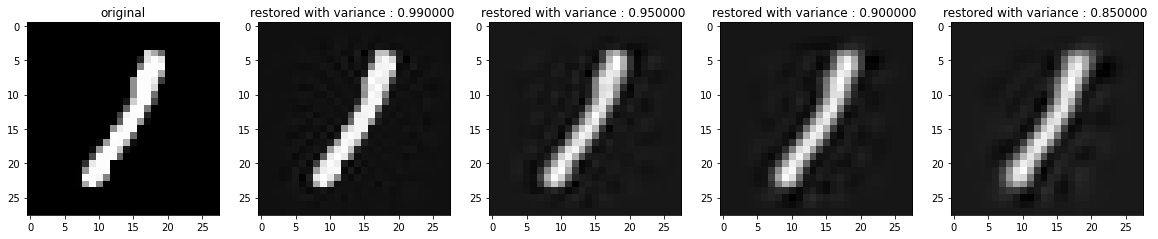

In [18]:
%matplotlib inline
m = [0.99, 0.95, 0.90, 0.85]

fig, ax = plt.subplots(1, 5,figsize=(20,25)) 
ax[0].imshow(images[443], cmap='gray')
ax[0].set_title('original')
for k in range (1,5):
    ax[k].imshow(find_for_3(m[k-1])[443].reshape(28, 28), cmap='gray')
    ax[k].set_title('restored with variance : %f '%m[k-1])
plt.show()

### Задача 4 
Поменяем чуть чуть изображение, сдвинув на матожидание произвольный столбец 

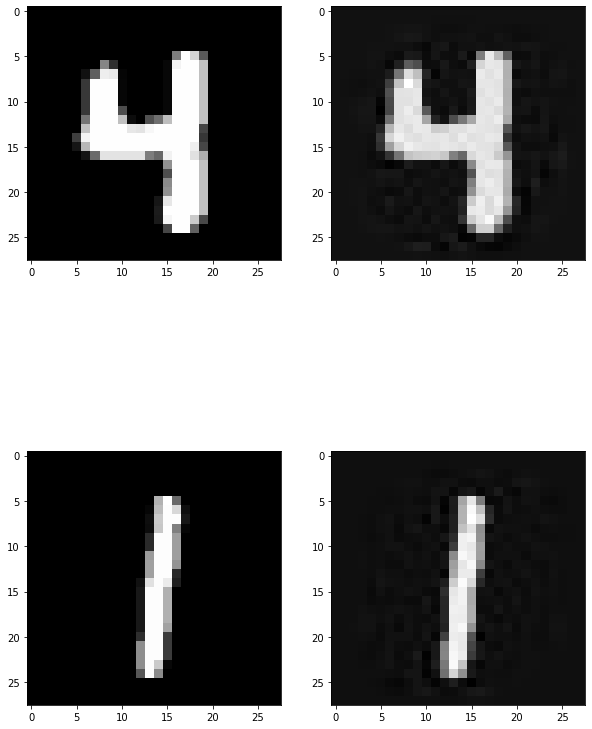

In [15]:
def sdvig(X,a): 
    X[:,a] = X[:,a] - np.mean(X[:,a])
def alg(n): 
    pca= PCA(n_components = n)
    X = pca.fit_transform(digits.data.astype(float))
    a = np.random.choice(np.arange(50))
    sdvig(X,a)
    return pca.inverse_transform(X)
fig, ax = plt.subplots(2,2,figsize=(10,15))
ax[0,0].imshow(images[58], cmap='gray')
ax[0,1].imshow(alg(300)[58].reshape(28,28),cmap='gray')
ax[1,0].imshow(images[40], cmap='gray')
ax[1,1].imshow(alg(251)[40].reshape(28,28),cmap='gray')
plt.show()    
    
    
    